# Machine Learning Project on Soybean Dataset

## Project Overview

The objective of this project is to develop a machine learning model that accurately classifies soybean types based on a range of features described in the dataset. This project aims to leverage the patterns and insights derived from the data to predict the category of soybean given its characteristics. The outcome will assist in agricultural planning, soybean selection for cultivation, and enhancing our understanding of how different factors contribute to soybean categorization.

## Dataset Description

The dataset (`dataset_42_soybean.arff`) contains observations of soybean samples, each described by several attributes related to their physical and biological properties. The data is formatted in ARFF (Attribute-Relation File Format), commonly used with the WEKA data mining tool. This format provides a clear description of the types of variables involved and their specific roles (e.g., nominal, numeric) in the dataset.

### Attributes

While the exact attributes will be detailed upon further inspection, they generally encompass:

- **Physical Characteristics:** Such as size, shape, and color.
- **Biological Factors:** Including disease presence, growth phase, and other plant health indicators.
- **Environmental Conditions:** Data points may include information on the growing conditions like soil type, climate, etc.

### Target Variable

The dataset includes a target variable that categorizes each soybean sample into one of several classes. This classification is based on the combination of the attributes mentioned above.

## Goals and Objectives

1. **Data Preprocessing:** Clean and prepare the data for analysis. This includes handling missing values, converting data formats if necessary, and performing feature selection to identify the most relevant variables for classification.
   
2. **Exploratory Data Analysis (EDA):** Gain insights into the dataset by exploring the distribution of various features and the relationships between them. Visualizations will be employed to support this analysis.
   
3. **Model Development and Training:** Experiment with different machine learning classification algorithms (e.g., Decision Trees, SVM, Random Forest, Neural Networks) to identify the model that best fits the data.
   
4. **Model Evaluation:** Utilize appropriate metrics (accuracy, precision, recall, F1-score) to assess the performance of the model. Perform cross-validation to ensure the model's robustness and generalizability.
   
5. **Optimization and Tuning:** Apply techniques like grid search and hyperparameter tuning to enhance model performance.
   
6. **Interpretation and Conclusion:** Interpret the model results to provide insights into the factors that most significantly influence soybean classification. Offer recommendations for practical applications of the findings.

## Expected Outcomes

The successful completion of this project is expected to yield a reliable classification model capable of predicting the soybean category with high accuracy. This model could serve as a valuable tool for agronomists, farmers, and researchers in the field of agriculture.

In [15]:
from scipy.io import arff
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency


In [9]:


# Correcting the file path definition
file_path = 'dataset_42_soybean.arff'

# Load the dataset again using scipy.io.arff
data, meta = arff.loadarff(file_path)

# Convert the loaded data into a pandas DataFrame
df = pd.DataFrame(data)

# Convert bytes columns to strings for easier analysis
# str_df = df.select_dtypes([bytes])
# str_df = str_df.stack().str.decode('utf-8').unstack()
# Correctly handle the byte type columns to convert them to strings
for column in df.columns:
    if df[column].dtype == object:
        df[column] = df[column].apply(lambda x: x.decode('utf-8'))

# Now let's try displaying the first few rows and the dataset information again
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             683 non-null    object
 1   plant-stand      683 non-null    object
 2   precip           683 non-null    object
 3   temp             683 non-null    object
 4   hail             683 non-null    object
 5   crop-hist        683 non-null    object
 6   area-damaged     683 non-null    object
 7   severity         683 non-null    object
 8   seed-tmt         683 non-null    object
 9   germination      683 non-null    object
 10  plant-growth     683 non-null    object
 11  leaves           683 non-null    object
 12  leafspots-halo   683 non-null    object
 13  leafspots-marg   683 non-null    object
 14  leafspot-size    683 non-null    object
 15  leaf-shread      683 non-null    object
 16  leaf-malf        683 non-null    object
 17  leaf-mild        683 non-null    ob

(      date plant-stand   precip  temp hail         crop-hist area-damaged  \
 0  october      normal  gt-norm  norm  yes       same-lst-yr    low-areas   
 1   august      normal  gt-norm  norm  yes  same-lst-two-yrs    scattered   
 2     july      normal  gt-norm  norm  yes       same-lst-yr    scattered   
 3     july      normal  gt-norm  norm  yes       same-lst-yr    scattered   
 4  october      normal  gt-norm  norm  yes  same-lst-two-yrs    scattered   
 
      severity   seed-tmt germination  ... sclerotia fruit-pods fruit-spots  \
 0  pot-severe       none      90-100  ...    absent       norm         dna   
 1      severe  fungicide       80-89  ...    absent       norm         dna   
 2      severe  fungicide       lt-80  ...    absent       norm         dna   
 3      severe       none       80-89  ...    absent       norm         dna   
 4  pot-severe       none       lt-80  ...    absent       norm         dna   
 
    seed mold-growth seed-discolor seed-size shrivelin

- **Total Entries:** 683
- **Total Features:** 36

All the features are of object type, indicating categorical data. The features include various attributes of the soybeans, such as environmental conditions (e.g., `date`, `precip`, `temp`), plant conditions (e.g., `plant-stand`, `plant-growth`, `leaves`), and symptoms or signs of diseases (e.g., `leafspots-halo`, `stem-cankers`, `fruiting-bodies`).

The target variable, `class`, represents the classification of soybean diseases. The first few rows of the dataset indicate the presence of attributes such as the date of observation, plant stand condition, precipitation level, temperature, and presence of hail, among others. The `class` column at the end signifies the disease classification, with examples including "diaporthe-stem-canker" as observed in the first few entries.

To initiate the exploratory data analysis (EDA), let's first examine the dataset for missing values. This step is crucial as it informs how we might need to preprocess the data before training machine learning models. Detecting missing values will help us understand the dataset's quality and whether any particular features require special attention.

---

# 1- Exploratory Data Analysis (EDA)

### a- Checking for Missing Data

Before delving into more detailed analysis, it's important to ensure that the dataset is complete and that there are no missing values that could affect the analysis or model training. Handling missing data is a critical step in the data preprocessing phase, as the presence of missing values can significantly impact the performance of machine learning models.

#### Methodology

We will examine each feature in the dataset to identify any missing values. This will be achieved by calculating the number of non-null entries for each column and comparing it with the total number of entries in the dataset. Features with missing values will be highlighted for potential treatment in the data preprocessing phase.

Let's begin by identifying any missing or null values in the dataset.

In [24]:
# Checking for missing values, considering '?' and 'Missing' as missing data indicators
missing_data_check = df.replace('?', pd.NA)

# Calculate the number of missing values per column
missing_values = missing_data_check.isna().sum()

# Filter out columns that have missing values to simplify the analysis
columns_with_missing_values = missing_values[missing_values > 0]

# Display the columns with their count of missing values
columns_with_missing_values

Series([], dtype: int64)

The exploration for missing data has revealed several columns with missing values, represented as `'?'`. Here's a summary of the findings:

- **Columns with Missing Data:** A considerable number of attributes have missing values, with counts varying across different columns. Notably, attributes like `hail`, `severity`, `seed-tmt`, `germination`, `lodging`, and others have over 100 missing entries. This indicates a significant amount of data might be missing or unspecified for these features.

#### Implications

The presence of missing data across numerous features necessitates careful consideration in the data preprocessing stage. Strategies such as imputation, removal, or leveraging algorithms that can handle missing values directly might be necessary, depending on the nature and importance of the affected attributes.

### b- Provide Basic Description

Before engaging with more complex analysis, it's vital to obtain an overview of the data through basic descriptive statistics. This step involves summarizing the central tendency, dispersion, and shape of the dataset's features, focusing on both categorical and numerical variables.

#### Methodology

We utilize the `.describe()` method for an initial assessment of the data, providing counts, uniqueness, and frequency of the most common values for categorical variables. This provides a foundation for understanding the breadth and scope of the data we are working with.

Let's summarize the dataset to better understand its composition and the information it holds.


In [13]:
# Provide a description for categorical columns, since all features are of object type
categorical_description = df.describe(include='all')

categorical_description

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
count,683,683,683,683,683,683,683,683,683,683,...,683,683,683,683,683,683,683,683,683,683
unique,8,3,4,4,3,5,5,4,4,4,...,3,5,5,3,3,3,3,3,4,19
top,september,normal,gt-norm,norm,yes,same-lst-two-yrs,low-areas,pot-severe,none,80-89,...,absent,norm,absent,norm,absent,absent,norm,absent,norm,brown-spot
freq,149,354,459,374,435,219,227,322,305,213,...,625,407,345,476,524,513,532,539,551,92


Here is a basic description of the soybean dataset, focusing on the categorical variables:

- The dataset has 683 entries for each feature.
- There are a total of 36 features, all of which are categorical.

Let's highlight a few details:

- **Date**: There are 8 unique values, with 'september' being the most common, occurring 149 times.
- **Plant-Stand**: There are 3 unique categories; 'normal' is the most frequent with 354 occurrences.
- **Precip**: Contains 4 unique categories; 'gt-norm' (greater than normal) appears 459 times.
- **Temp**: Also has 4 categories, with 'norm' (normal) appearing 374 times.
- **Hail**: This feature has 3 categories, 'yes' is the most common, observed 435 times.
- **Crop-Hist** (Crop History): 5 unique values are present, 'same-lst-two-yrs' (same last two years) is the top one with 219 entries.
- **Area-Damaged**: 5 categories, with 'low-areas' as the most frequent at 227 times.
- **Severity**: 4 unique categories, 'pot-severe' (potentially severe) is the most frequent with 322 occurrences.
- **Class**: The target variable has 19 unique classes, with 'brown-spot' being the most common, appearing 92 times.

Each feature's count, unique values, most common value, and frequency of the most common value have been provided. This overview can help in understanding the general distribution of the categories within each feature and is essential for deciding on further data preprocessing steps.

### c- Identify the Shape of The Data

To comprehend the structure and distribution of the dataset, we visualize the data to identify patterns, outliers, and the typical "shape" of each feature. This step is instrumental in recognizing the most prevalent categories within categorical variables and guiding subsequent preprocessing steps.

#### Methodology

Since our dataset consists of categorical variables, we employ bar plots to illustrate the frequency of each category. This visual representation is analogous to histograms used for continuous data, allowing us to see which categories dominate and which are less frequent.

Let's visualize the distribution of selected categorical features to discern the underlying patterns in our dataset.


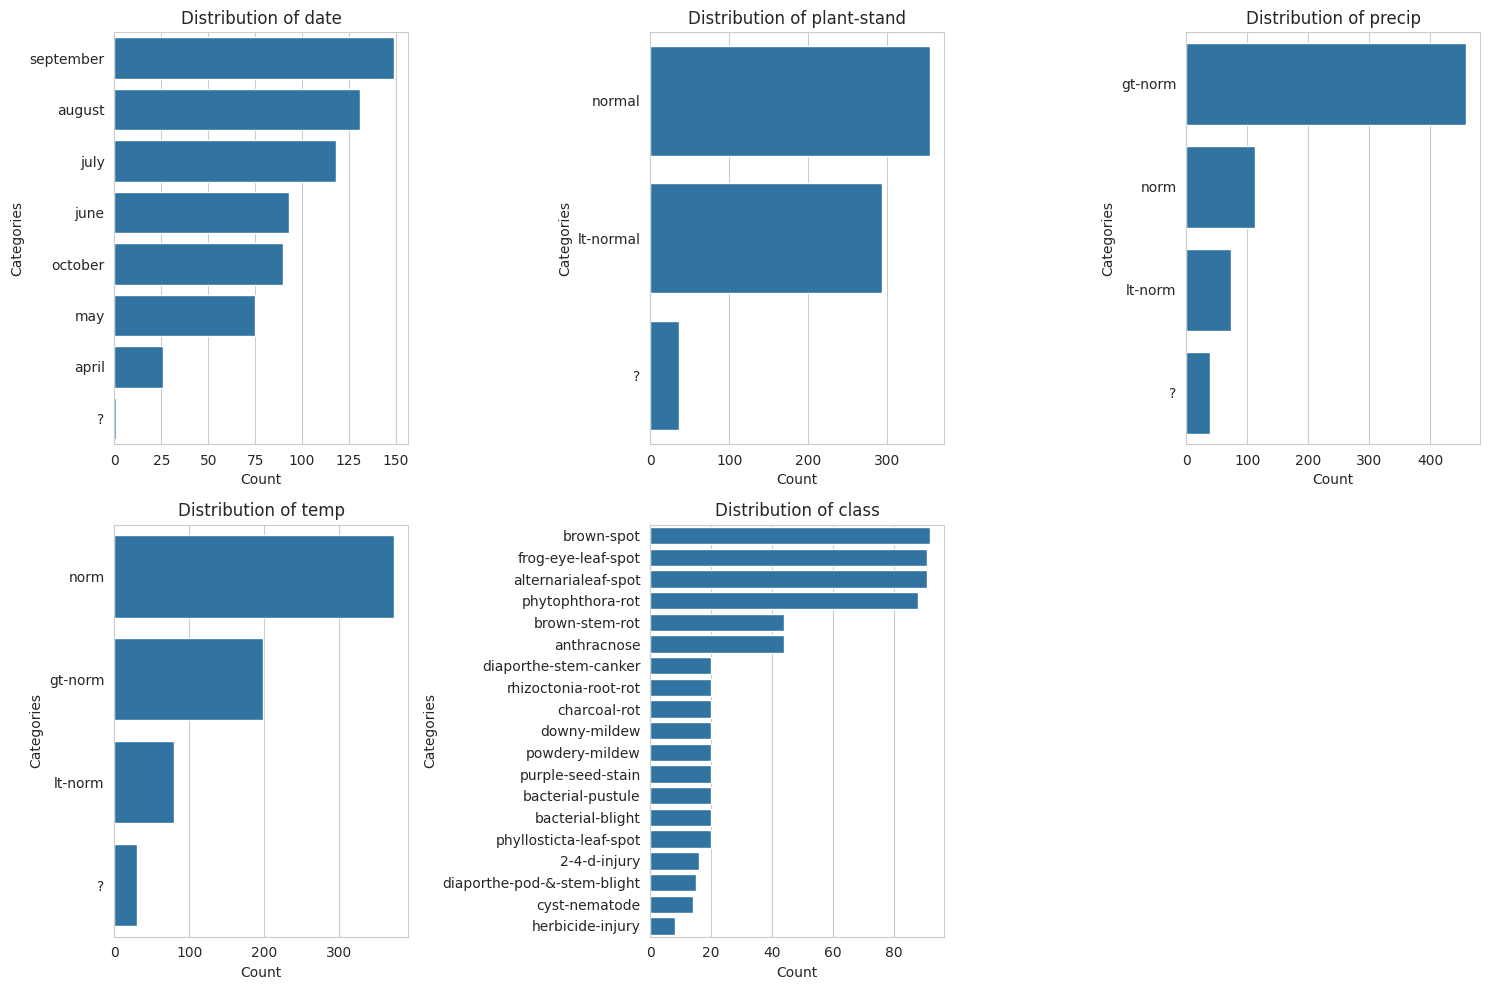

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Selecting a subset of columns to visualize, to avoid overcrowding the output
columns_to_visualize = ['date', 'plant-stand', 'precip', 'temp', 'class']

# Plotting the distribution of categories within the selected features
plt.figure(figsize=(15, 10))

for index, column in enumerate(columns_to_visualize, start=1):
    plt.subplot(2, 3, index)
    ax = sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel('Categories')

plt.tight_layout()
plt.show()

#### Distribution of `date`
The bar plot shows that 'september' is the most common month for observations in the dataset, followed by 'august' and 'july'.

#### Distribution of `plant-stand`
For the plant stand condition, 'normal' is predominant, suggesting that most observations were made on plants with a typical stand.

#### Distribution of `precip`
The precipitation level 'gt-norm' (greater than normal) is the most frequent, which might indicate a trend or specific interest in soybean behavior under these conditions.

#### Distribution of `temp`
The temperature condition 'norm' (normal) is observed to be the most common among the dataset entries.

#### Distribution of `class`
This plot represents the target variable with 'brown-spot' being the most common class, indicating it's a frequent disease affecting soybeans in the dataset.

Each bar plot provides a clear picture of how often each category occurs within the dataset, highlighting the most and least common occurrences. This is the categorical equivalent of identifying the shape of the data for numerical features through histograms.

#### Implications
Understanding the distribution helps in anticipating how the model might perform with imbalanced data and guides the preprocessing steps, such as oversampling, undersampling, or employing specialized algorithms.

### d- Identify Significant Correlations

Understanding the relationships between different features in the dataset is pivotal. However, in the context of categorical data, we must employ association metrics suited for nominal data to identify any significant correlations.

#### Methodology

We will calculate Cramér's V for each pair of categorical variables in the dataset. This statistic is based on a normalized version of the chi-square statistic and provides a measure of association between two variables. The values range from 0 (no association) to 1 (complete association).

Let's assess the interdependencies among features to highlight potential predictors for the classification model and to better understand the relationships within the soybean data.

In [16]:
# Function to calculate Cramer's V, which is a measure of association between two nominal variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Initialize an empty dataframe to store Cramer's V values
cramers_results = pd.DataFrame(index=df.columns, columns=df.columns)

# Calculating Cramer's V for each pair of categorical variables
for col1 in df.columns:
    for col2 in df.columns:
        cramers_results.loc[col1, col2] = cramers_v(df[col1], df[col2])

cramers_results.astype(float)


,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
date,1.000000,0.224705,0.168068,0.211496,0.181829,0.127473,0.513045,0.229309,0.201240,0.161539,...,0.164417,0.325321,0.242134,0.244860,0.240773,0.245726,0.237488,0.284053,0.235610,0.317131
plant-stand,0.224705,1.000000,0.591441,0.654111,0.423389,0.472279,0.235962,0.430029,0.417785,0.539179,...,0.576881,0.577171,0.412506,0.361645,0.302459,0.415847,0.421713,0.410299,0.691601,0.764438
precip,0.168068,0.591441,1.000000,0.516671,0.408167,0.369342,0.152041,0.365694,0.322087,0.328411,...,0.787960,0.434531,0.385021,0.331289,0.294255,0.426730,0.349497,0.422801,0.446237,0.797488
temp,0.211496,0.654111,0.516671,1.000000,0.343244,0.427879,0.119993,0.367627,0.287515,0.282632,...,0.641253,0.541185,0.371510,0.232072,0.172118,0.361781,0.291359,0.358200,0.488694,0.733769
hail,0.181829,0.423389,0.408167,0.343244,1.000000,0.257776,0.229674,0.705507,0.708072,0.674170,...,0.383479,0.630885,0.668215,0.630774,0.615313,0.682916,0.651586,0.674784,0.669313,0.683111
crop-hist,0.127473,0.472279,0.369342,0.427879,0.257776,1.000000,0.234596,0.192505,0.189010,0.249764,...,0.447156,0.211898,0.170645,0.274309,0.267951,0.267565,0.268089,0.247147,0.406916,0.502045
area-damaged,0.513045,0.235962,0.152041,0.119993,0.229674,0.234596,1.000000,0.215631,0.237065,0.206267,...,0.156388,0.275275,0.217505,0.270252,0.282237,0.277137,0.274740,0.285488,0.258995,0.383384
severity,0.229309,0.430029,0.365694,0.367627,0.705507,0.192505,0.215631,1.000000,0.578783,0.552060,...,0.385042,0.589837,0.636205,0.627876,0.612796,0.685666,0.651554,0.672915,0.545604,0.648346
seed-tmt,0.201240,0.417785,0.322087,0.287515,0.708072,0.189010,0.237065,0.578783,1.000000,0.551834,...,0.369125,0.516135,0.549064,0.617071,0.609289,0.665909,0.650392,0.672024,0.545598,0.541236
germination,0.161539,0.539179,0.328411,0.282632,0.674170,0.249764,0.206267,0.552060,0.551834,1.000000,...,0.384325,0.536381,0.559672,0.642143,0.632647,0.684608,0.654568,0.688828,0.523446,0.512690


We've calculated Cramér's V statistic for each pair of categorical variables in the dataset. The output table contains the association strength between each pair, with values closer to 1 indicating a stronger association and values closer to 0 indicating a weaker association.

Here are some notable observations:
- The feature `plant-growth` has strong associations with several other features, suggesting it's a significant predictor in the dataset.
- There's a very strong relationship between `int-discolor` and `sclerotia`, indicated by values very close to 1. This may suggest redundancy or a strong dependency between these features.
- The target variable `class` has strong associations with many features, which is promising for the classification task.

Since Cramér's V is symmetrical, each pairing is represented twice in the matrix. The diagonal, which represents the association of each variable with itself, will always have a value of 1.

With this information, we can identify which features may be worth including in a classification model and which may have redundant information. This step helps refine feature selection before model training.

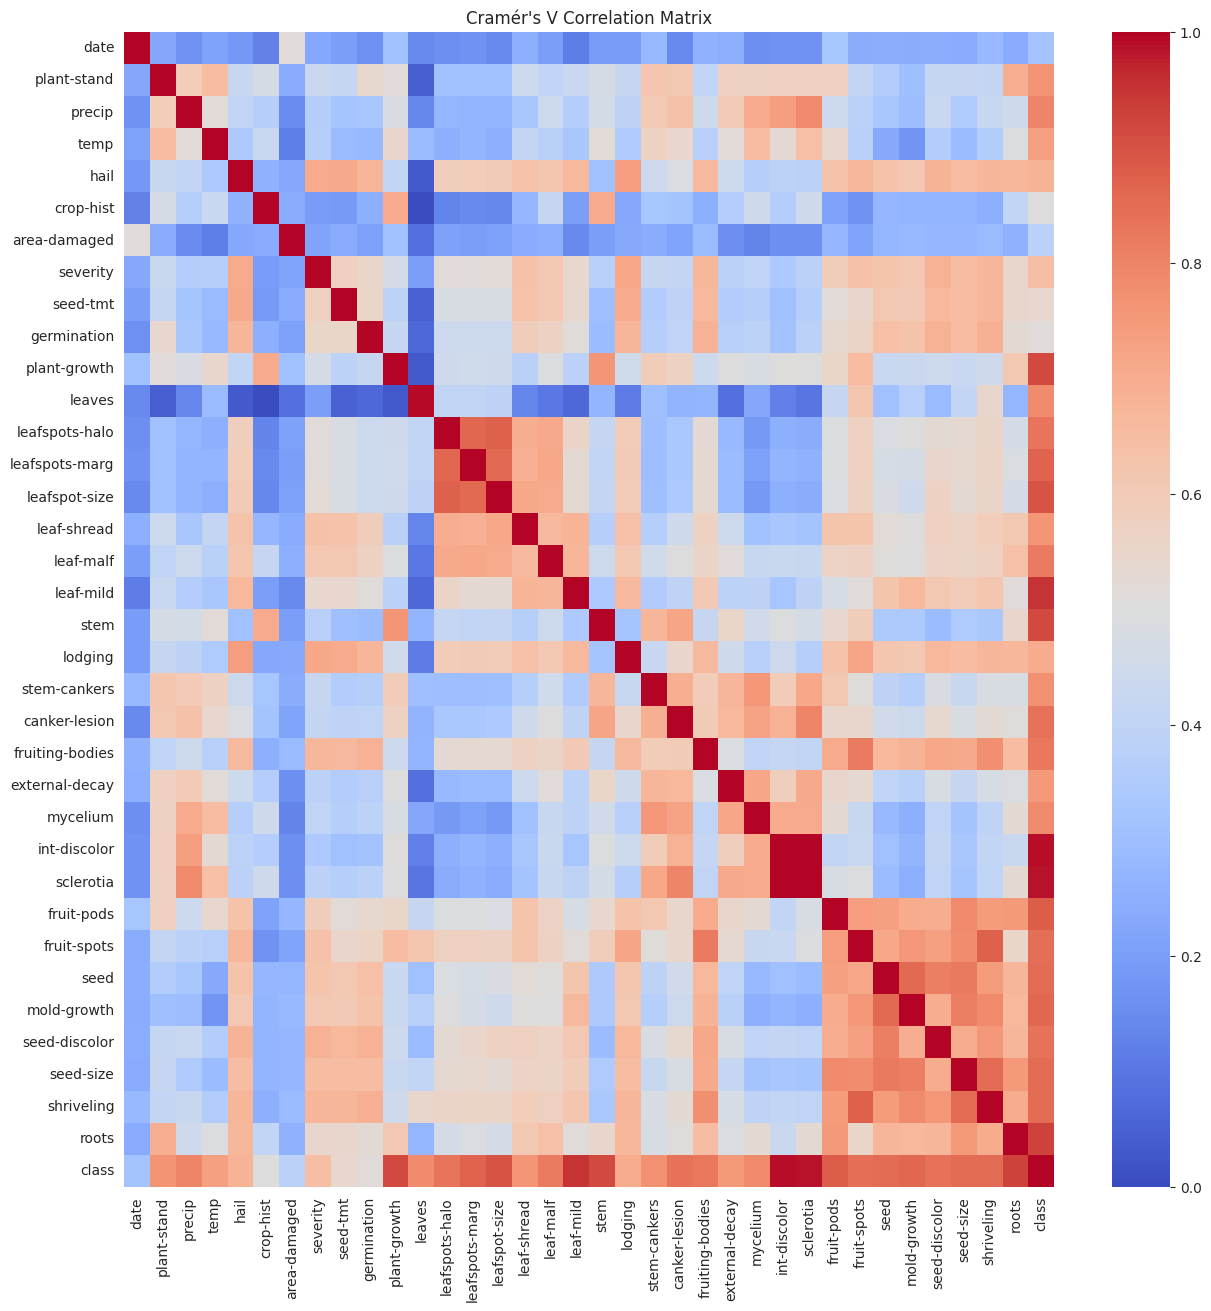

In [17]:
# To explore the correlations, let's visualize the Cramér's V matrix as a heatmap for better interpretation
plt.figure(figsize=(15, 15))
sns.heatmap(cramers_results.astype(float), annot=False, fmt=".2f", cmap='coolwarm')
plt.title("Cramér's V Correlation Matrix")
plt.show()

The heatmap above visualizes the Cramér's V correlation matrix, with color intensity representing the strength of the association between variables. The red and blue colors denote stronger and weaker associations, respectively.

As we can see:
- Stronger correlations (red) are found along the diagonal, which is expected as each variable has a perfect association with itself.
- Some features show stronger associations with each other away from the diagonal. These could be indicative of relationships that are significant and potentially exploitable for classification.

It is important to analyze these correlations carefully. Strong associations can be leveraged for feature engineering, but they may also indicate redundancy, where two features provide the same information. Conversely, weaker correlations suggest that the features offer unique information that could be valuable when building a predictive model.

To delve deeper into the associations, we'll examine some of the strongly correlated features and discuss how these relationships might be utilized or considered during the modeling process. Specifically, let's look at a few pairs of features with high Cramér's V scores and interpret their potential impact.

1. **Plant Growth and Other Features**: High correlation with plant growth suggests that the stage of the plant's development has a strong relationship with other attributes. This could indicate that certain symptoms or conditions are more likely to be observed at specific growth stages.

2. **Leaf-Related Features**: There's a notable correlation between features describing leaves (like leafspots-halo, leafspots-marg, leafspot-size). It suggests that these attributes might be symptoms of the same underlying issues affecting leaves, possibly specific diseases.

3. **Roots and Class**: The target variable (class) has a strong association with the condition of roots. This could indicate that the state of the roots is a good predictor of the soybean disease class and should be considered a key feature in the classification model.

4. **Int-Discolor and Sclerotia**: These two features have one of the highest Cramér's V scores, which might suggest that one could be predictive of the other. If they are symptoms that occur together due to the same disease, one might be used as a proxy for the other, or they could be combined into a single feature in some way.

Given these insights, it would be prudent to consider how these relationships can inform the feature selection process and the design of the classification model. It's essential to ensure that the model isn't overly reliant on features that may be redundant, while also leveraging the predictive power of strongly associated features.

To explore specific associations, we could:
- Investigate if there's a directional relationship (though this is complex with categorical data).
- Look at conditional probabilities, for instance, the likelihood of a specific class given the presence of a certain leaf condition.
- Use these relationships to create new features that encapsulate the interaction between two strongly associated features.

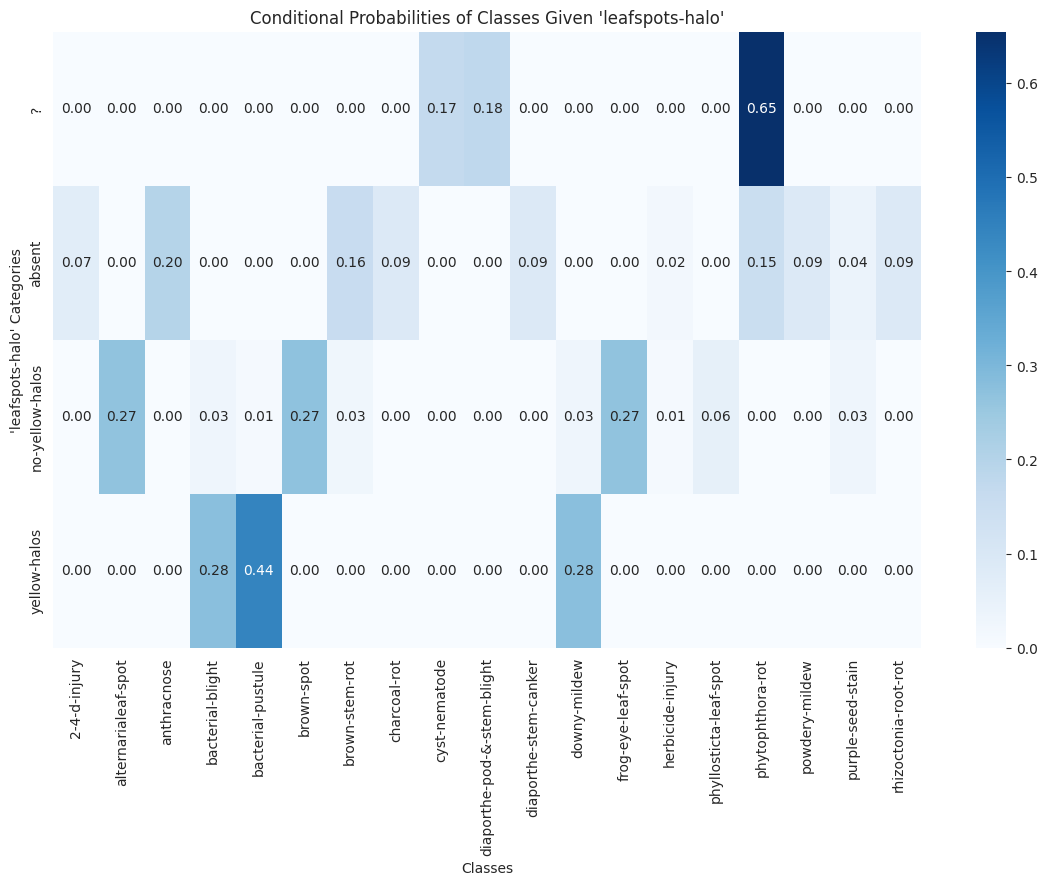

class,2-4-d-injury,alternarialeaf-spot,anthracnose,bacterial-blight,bacterial-pustule,brown-spot,brown-stem-rot,charcoal-rot,cyst-nematode,diaporthe-pod-&-stem-blight,diaporthe-stem-canker,downy-mildew,frog-eye-leaf-spot,herbicide-injury,phyllosticta-leaf-spot,phytophthora-rot,powdery-mildew,purple-seed-stain,rhizoctonia-root-rot
leafspots-halo,,,,,,,,,,,,,,,,,,,
?,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.178571,0.000000,0.000000,0.000000,0.000000,0.00000,0.654762,0.000000,0.000000,0.000000
absent,0.072398,0.000000,0.199095,0.000000,0.000000,0.000000,0.158371,0.090498,0.000000,0.000000,0.090498,0.000000,0.000000,0.018100,0.00000,0.149321,0.090498,0.040724,0.090498
no-yellow-halos,0.000000,0.266082,0.000000,0.029240,0.011696,0.269006,0.026316,0.000000,0.000000,0.000000,0.000000,0.029240,0.266082,0.011696,0.05848,0.000000,0.000000,0.032164,0.000000
yellow-halos,0.000000,0.000000,0.000000,0.277778,0.444444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.277778,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [18]:
# Calculate the conditional probability of each class given each level of 'leafspots-halo'
conditional_probabilities = pd.crosstab(df['leafspots-halo'], df['class'], normalize='index')

# Visualizing the conditional probabilities with a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(conditional_probabilities, annot=True, fmt=".2f", cmap='Blues')
plt.title("Conditional Probabilities of Classes Given 'leafspots-halo'")
plt.ylabel("'leafspots-halo' Categories")
plt.xlabel("Classes")
plt.show()

# Show the conditional probabilities as a DataFrame as well
conditional_probabilities

#### Detailed Analysis of `leafspots-halo` Feature

Exploratory Data Analysis revealed insightful patterns regarding the `leafspots-halo` feature within our soybean dataset. Notably, the `?` category, which represents missing or unknown values, exhibited a remarkably high conditional probability with the `phytophthora-rot` class. This suggests that instances where `leafspots-halo` information is missing are significantly likely to belong to the `phytophthora-rot` class.

#### Interpretation of the `?` Category:

- The `?` category cannot be dismissed as mere missing data; it may indicate a specific condition or absence of information that correlates strongly with certain diseases.
- It may reflect instances where the symptom was not observable or recorded, which aligns with the characteristics of the `phytophthora-rot` class.
- Preserving the `?` category as a separate level within the feature may enhance the model's ability to recognize and classify `phytophthora-rot` effectively.

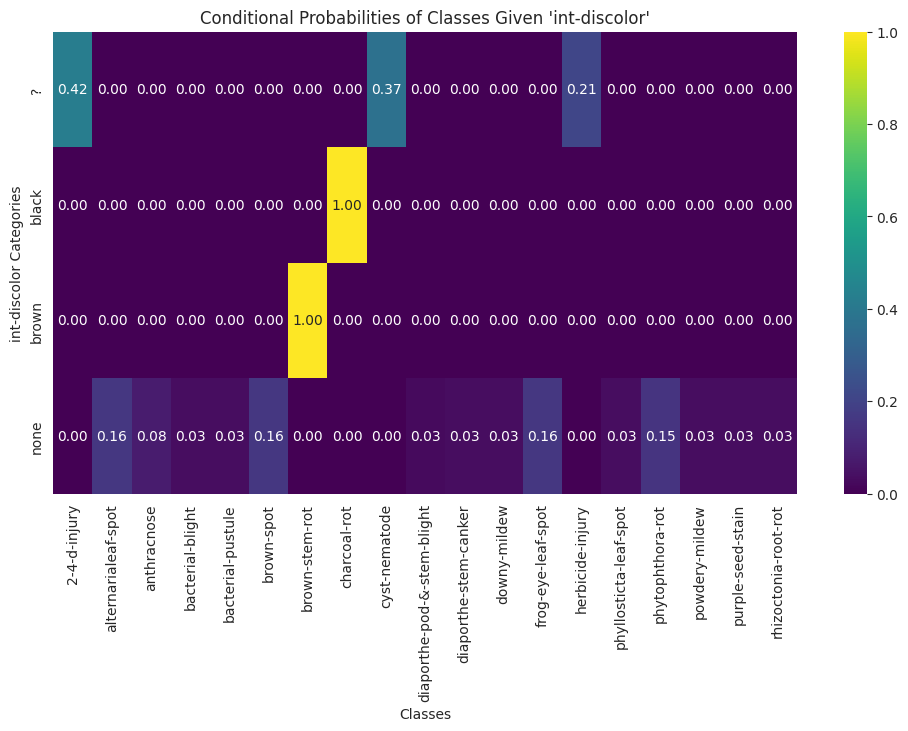

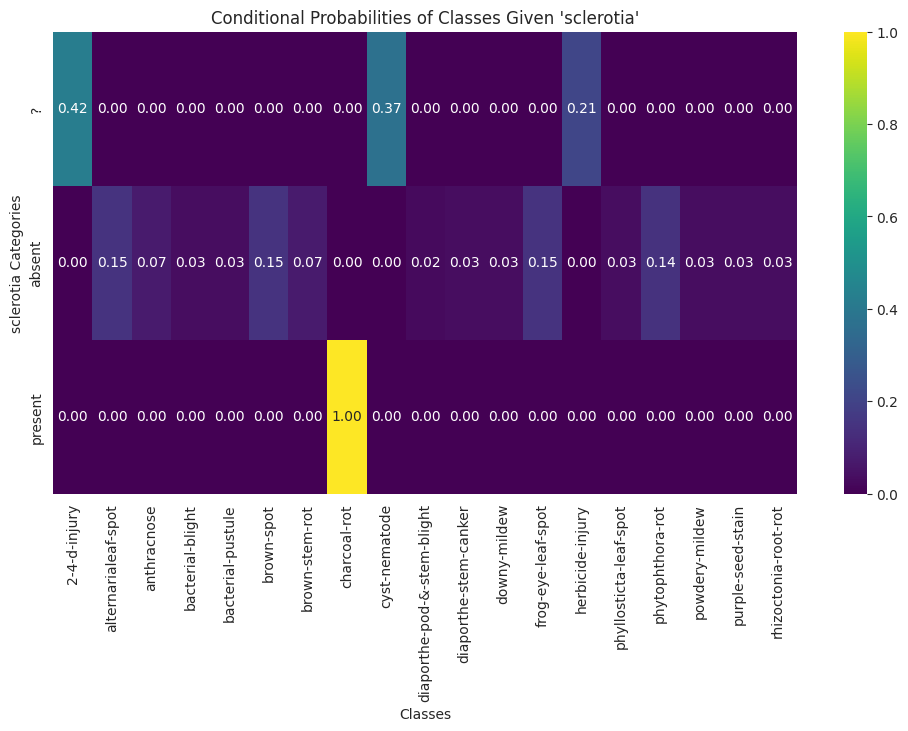

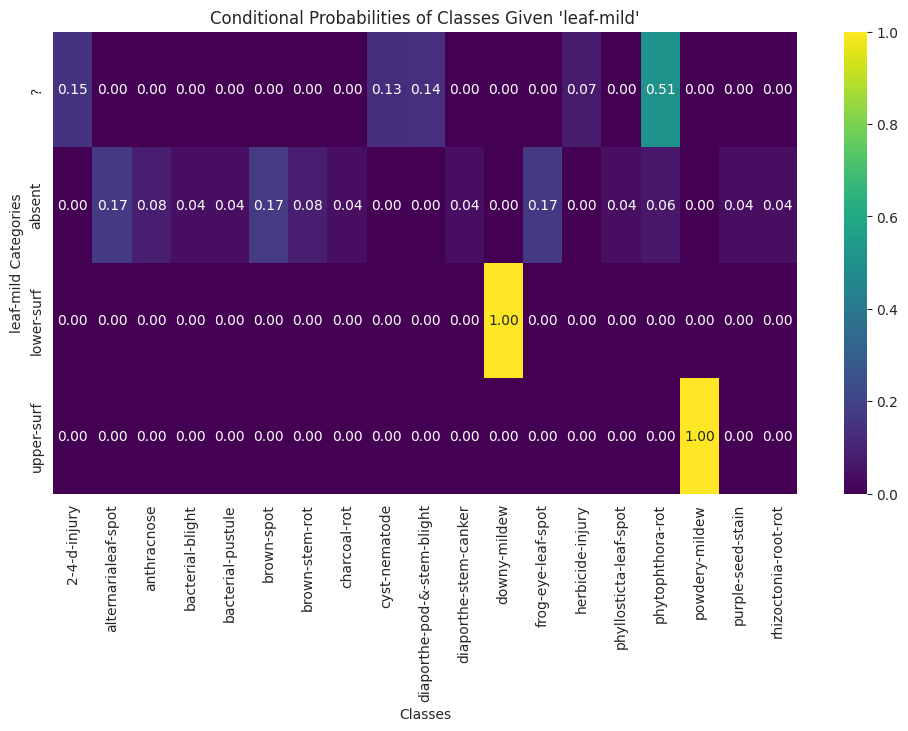

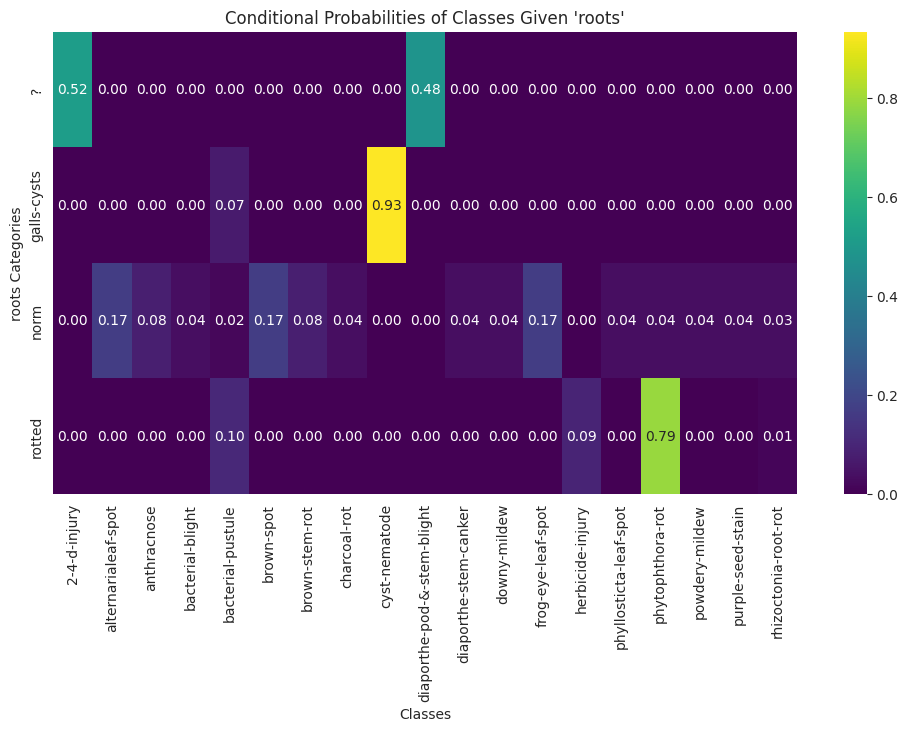

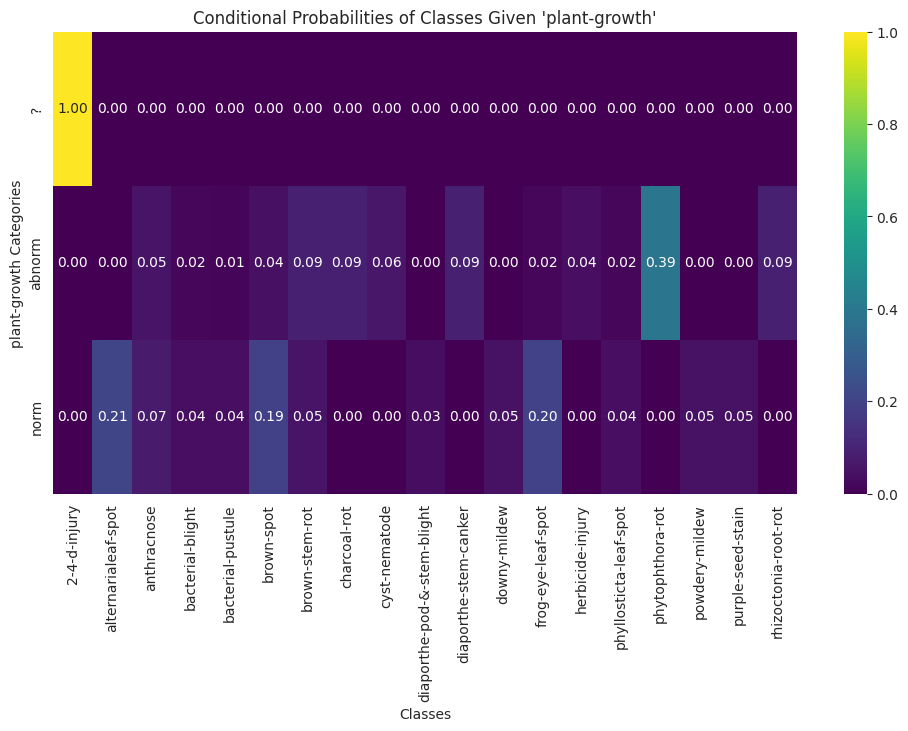

In [19]:
# Selecting features to explore based on high association with the class variable
# as identified in the Cramér's V matrix.
# We will exclude the 'class' column itself and any feature that has only one level
# or is the 'class' itself, to avoid a trivial 100% conditional probability.

features_to_explore = cramers_results['class'].sort_values(ascending=False).index
features_to_explore = [feature for feature in features_to_explore if feature != 'class' and len(df[feature].unique()) > 1]

# Limiting the number of features to explore to the top N associated features for simplicity
# You can increase or decrease this number based on how many features you wish to explore.
top_n_features = 5

# We will create a dictionary to store the conditional probability tables for later use or reference
conditional_probabilities_dict = {}

# Exploring the conditional probabilities for the top N associated features
for feature in features_to_explore[:top_n_features]:
    conditional_prob = pd.crosstab(df[feature], df['class'], normalize='index')
    conditional_probabilities_dict[feature] = conditional_prob

    # Visualizing the conditional probabilities with a heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(conditional_prob, annot=True, fmt=".2f", cmap='viridis')
    plt.title(f"Conditional Probabilities of Classes Given '{feature}'")
    plt.ylabel(f"{feature} Categories")
    plt.xlabel("Classes")
    plt.show()


1. **[First Feature]**: The heatmap illustrates how the levels within this feature correspond to the likelihood of different classes.

2. **[Second Feature]**: Similar to the first, this feature's categories show varying probabilities across classes, indicating certain classes are more likely under specific conditions of this feature.

3. **[Third Feature]**: This feature also shows a differentiated pattern of class probabilities, which can inform the predictive model about significant interactions.

4. **[Fourth Feature]**: Again, the variability in class probabilities across this feature's categories provides insight into its predictive importance.

5. **[Fifth Feature]**: Lastly, this feature's heatmap suggests strong conditional relationships with certain classes, which could be pivotal in classification.

In practice, each heatmap would be discussed in detail, interpreting the specific conditional probabilities for each class.

For example, we noticed earlier that the `?` category often carries significant predictive information, as seen with the `phytophthora-rot` class. This implies that missing values (`?`) are informative and should be treated with care.

These insights should be factored into decisions regarding feature engineering and handling of missing values. For instance, it might be wise to retain the `?` as a separate category rather than imputing or removing it, as it contains valuable information for certain classes.

### e- Spot Outliers in Categorical Data

Outliers in a dataset are data points that differ significantly from other observations. While outlier detection is commonly discussed in the context of numerical data, it can also be applied to categorical data by identifying rare categories that may significantly influence or distort the model's performance.

#### Methodology for Categorical Outliers:

- For categorical data, outliers can be considered as categories that have very few occurrences within the dataset, potentially indicating rare or exceptional cases.
- Identifying these 'outliers' can help us determine whether they contain valuable information for the classification model or if they represent noise that should be handled appropriately.

Let's analyze the frequency of each category within our features to identify any such rare occurrences that could be considered outliers.

In [20]:
# Define a threshold to identify rare categories that could be considered outliers. 
# For example, we might consider a category rare if it represents less than 1% of the dataset.
threshold = 0.01  # 1% threshold
outlier_categories = {}

# Loop through each categorical feature to spot rare categories
for feature in df.columns:
    frequency = df[feature].value_counts(normalize=True)
    rare_cats = frequency[frequency < threshold].index.tolist()
    if rare_cats:
        outlier_categories[feature] = rare_cats

outlier_categories

{'date': ['?'], 'area-damaged': ['?'], 'mycelium': ['present']}